In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import multi_loc.covariance as covariance

In [3]:
%matplotlib notebook

In [4]:
dimension = 40
rho0 = 10
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)

In [5]:
P_cov = covariance.make_correlation_matrix(
    rho, rho0, covariance.correlation_sqd_exp)

<IPython.core.display.Javascript object>


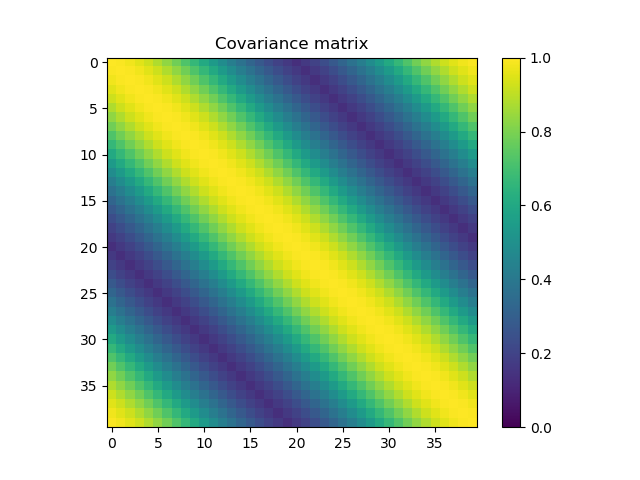

3.2477381695307983


In [6]:
plt.figure()
image = plt.imshow(P_cov, vmin=0, vmax=1)
plt.colorbar(image)
plt.title('Covariance matrix')
print(np.log10(np.linalg.cond(P_cov)))

P_eval, P_evec = sp.linalg.eig(P_cov)

plt.figure()
plt.plot(P_eval.real)
plt.title('eigenvalues from eig')

plt.figure()
plt.plot(P_eval[P_eval.real < 0].real)
print(P_eval[P_eval.real < 0].real)
plt.title('negative eigenvalues from eig')

<IPython.core.display.Javascript object>


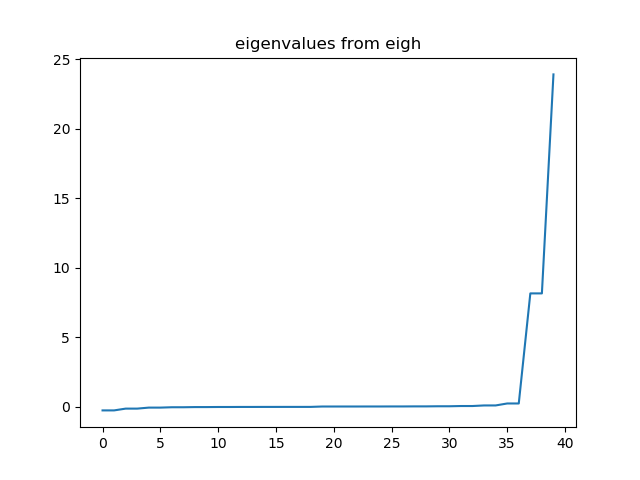

<IPython.core.display.Javascript object>


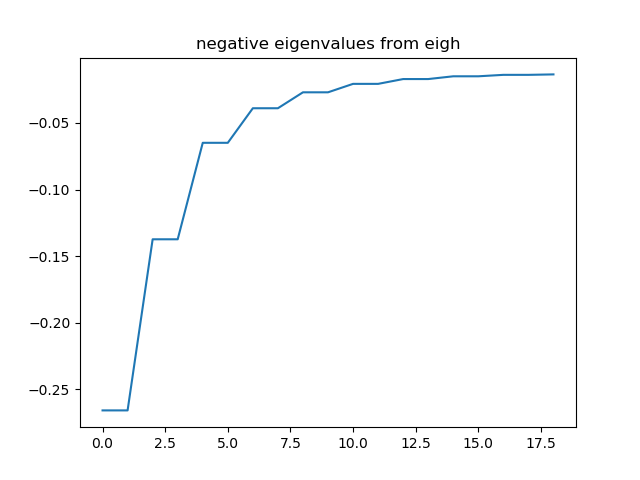

[-0.26587269 -0.26587269 -0.1373625  -0.1373625  -0.06490217 -0.06490217
 -0.03894089 -0.03894089 -0.02697352 -0.02697352 -0.02063177 -0.02063177
 -0.01702134 -0.01702134 -0.01494567 -0.01494567 -0.01386047 -0.01386047
 -0.01352215]


In [7]:
P_eval, P_evec = sp.linalg.eigh(P_cov)

plt.figure()
plt.plot(P_eval)
plt.title('eigenvalues from eigh')

plt.figure()
plt.plot(P_eval[P_eval< 0])
plt.title('negative eigenvalues from eigh')
print(P_eval[P_eval< 0])

In [8]:
P_inv = P_evec @ np.diag(1/P_eval) @ P_evec.T

<IPython.core.display.Javascript object>


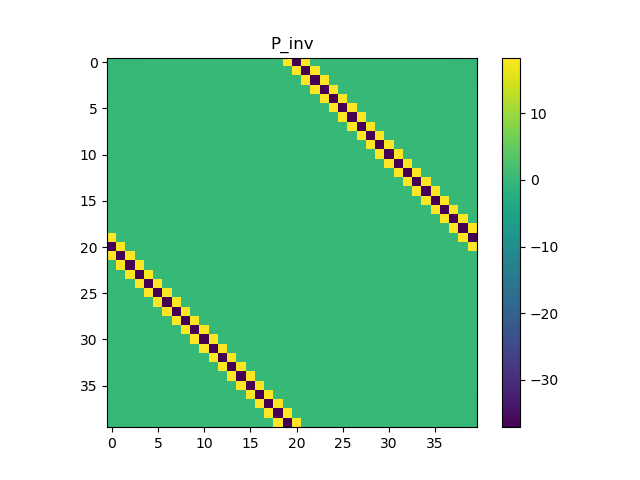

<IPython.core.display.Javascript object>


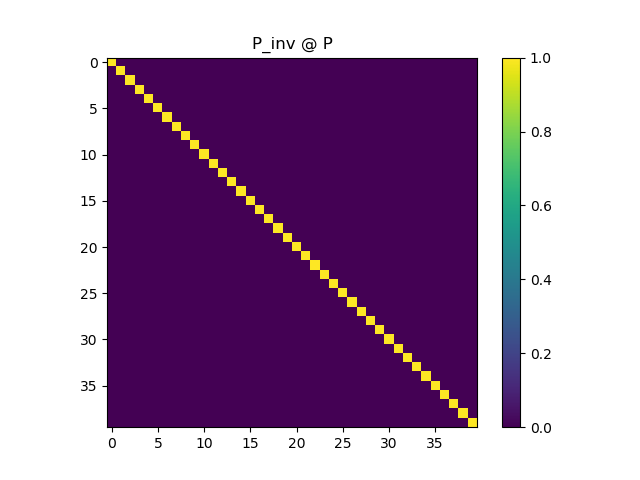

Text(0.5,1,'P_inv @ P')

In [9]:
plt.figure()
image = plt.imshow(P_inv)
plt.colorbar(image)
plt.title('P_inv')

plt.figure()
image = plt.imshow(P_inv @ P_cov)
plt.colorbar(image)
plt.title('P_inv @ P')

In [10]:
P_sqrt = (P_evec
          @ np.diag(np.sqrt(P_eval + 0j))
          @ P_evec.T)
P_inv_sqrt = (P_evec
              @ np.diag(np.sqrt((1/P_eval) + 0j))
              @ P_evec.T)

<IPython.core.display.Javascript object>


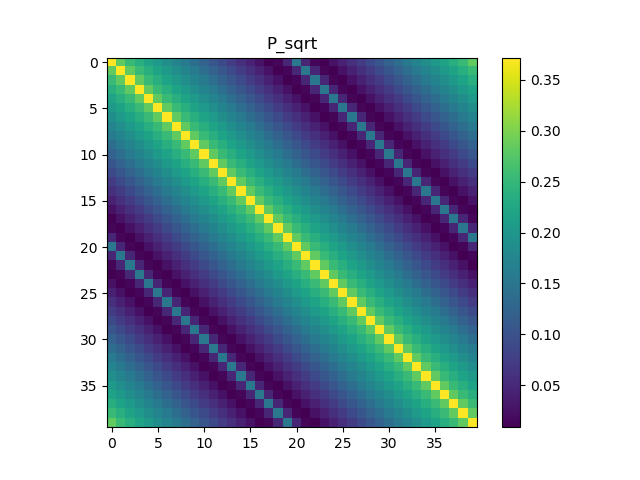

<IPython.core.display.Javascript object>


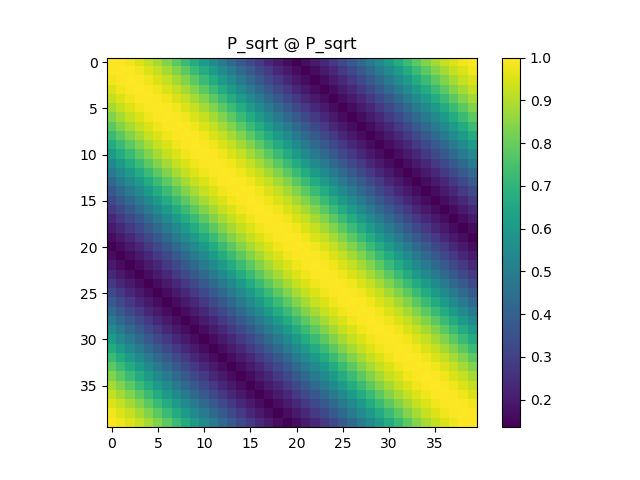

<IPython.core.display.Javascript object>


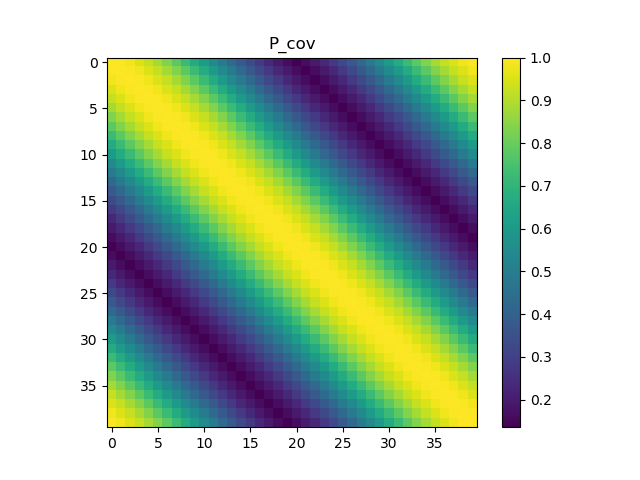

<IPython.core.display.Javascript object>


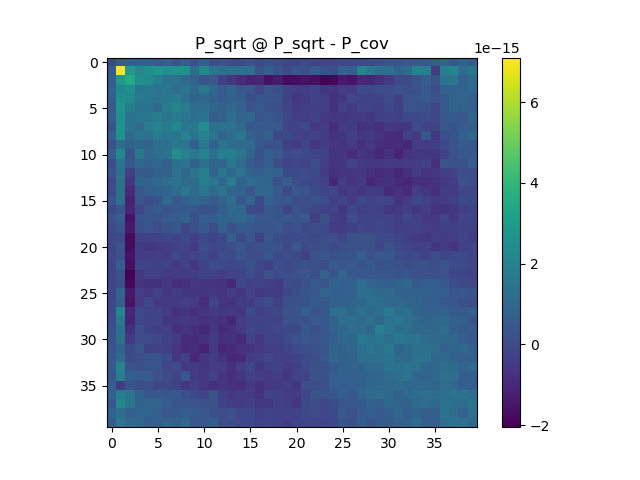

<IPython.core.display.Javascript object>


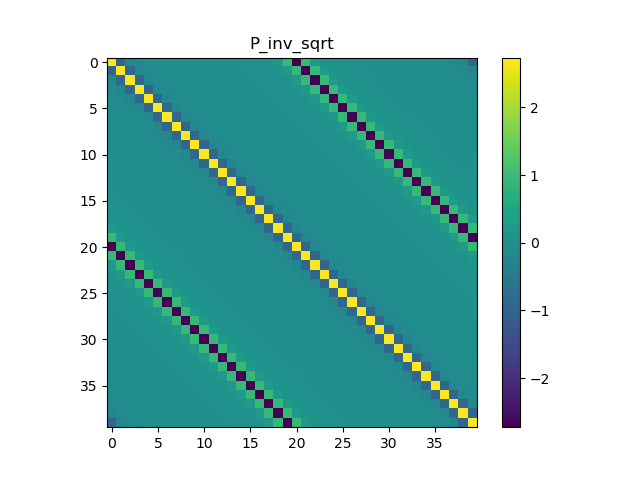

<IPython.core.display.Javascript object>


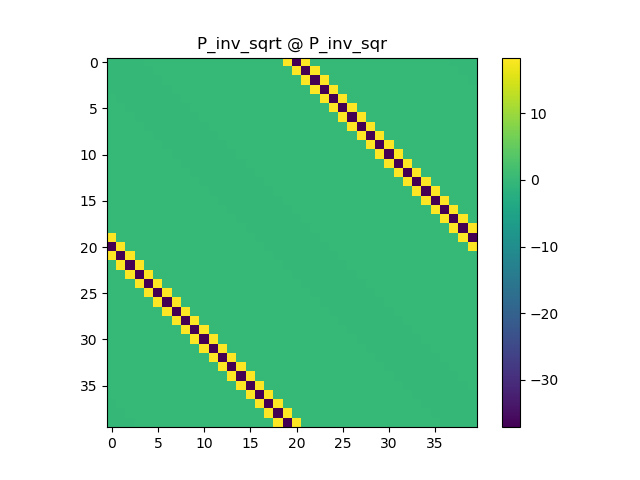

<IPython.core.display.Javascript object>


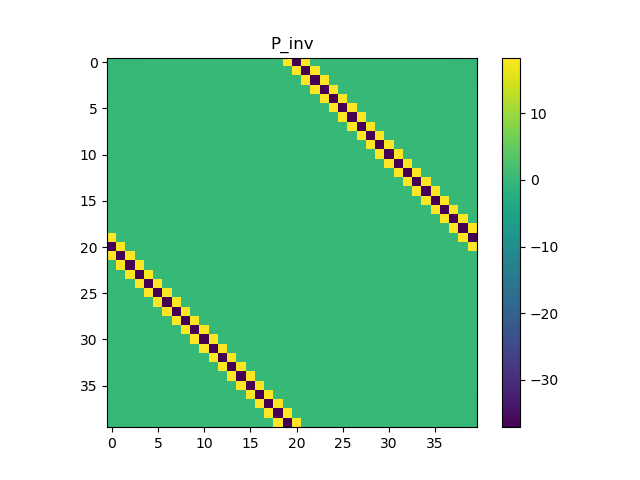

<IPython.core.display.Javascript object>


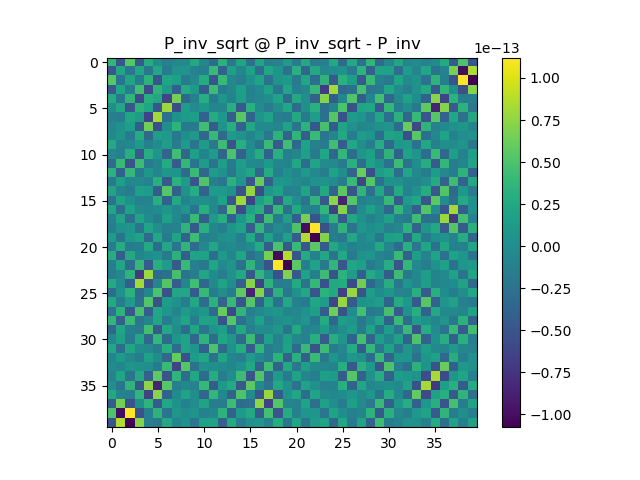

Text(0.5,1,'P_inv_sqrt @ P_inv_sqrt - P_inv')

In [11]:
plt.figure()
image = plt.imshow(np.abs(P_sqrt))
plt.colorbar(image)
plt.title('P_sqrt')

plt.figure()
image = plt.imshow(np.abs((P_sqrt @ P_sqrt.T)))
plt.colorbar(image)
plt.title('P_sqrt @ P_sqrt')

plt.figure()
image = plt.imshow((P_cov))
plt.colorbar(image)
plt.title('P_cov')

plt.figure()
image = plt.imshow(np.abs(P_sqrt @ P_sqrt.T) - P_cov)
plt.colorbar(image)
plt.title('P_sqrt @ P_sqrt - P_cov')

plt.figure()
image = plt.imshow((P_inv_sqrt).real)
plt.colorbar(image)
plt.title('P_inv_sqrt')

plt.figure()
image = plt.imshow((P_inv_sqrt @ P_inv_sqrt).real)
plt.colorbar(image)
plt.title('P_inv_sqrt @ P_inv_sqr')

plt.figure()
image = plt.imshow(P_inv)
plt.colorbar(image)
plt.title('P_inv')

plt.figure()
image = plt.imshow((P_inv_sqrt @ P_inv_sqrt).real - P_inv)
plt.colorbar(image)
plt.title('P_inv_sqrt @ P_inv_sqrt - P_inv')

<IPython.core.display.Javascript object>


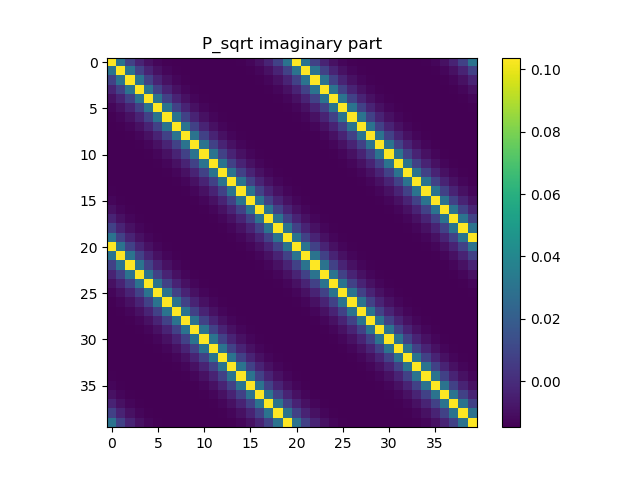

<IPython.core.display.Javascript object>


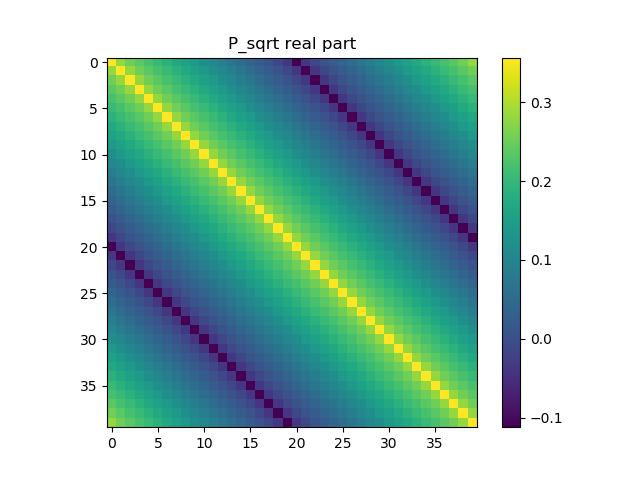

Text(0.5,1,'P_sqrt real part')

In [12]:
plt.figure()
image = plt.imshow(P_sqrt.imag)
plt.colorbar(image)
plt.title('P_sqrt imaginary part')

plt.figure()
image = plt.imshow(P_sqrt.real)
plt.colorbar(image)
plt.title('P_sqrt real part')


In [13]:
R_cov = np.eye(int(round(dimension/2)))

<IPython.core.display.Javascript object>


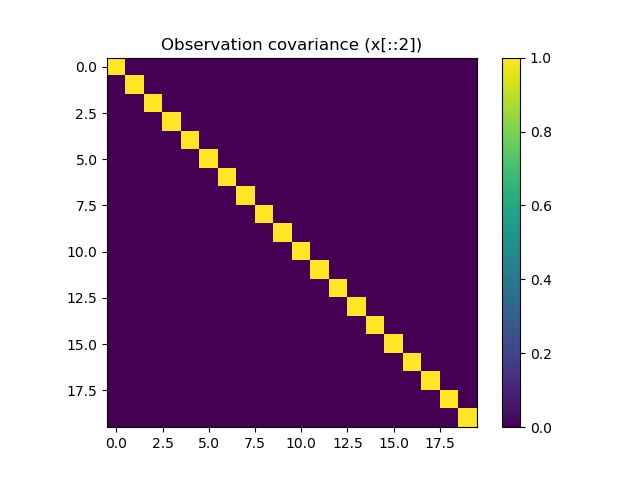

Text(0.5,1,'Observation covariance (x[::2])')

In [14]:
plt.figure()
image = plt.imshow(R_cov)
plt.colorbar(image)
plt.title('Observation covariance (x[::2])')

In [15]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [16]:
P_sqrt, P_eval, P_evec = covariance.matrix_sqrt(P_cov, return_eig=True)
R_sqrt, R_eval, R_evec = covariance.matrix_sqrt(R_cov, return_eig=True)

In [17]:
P_inv = covariance.matrix_inv(eig_val=P_eval,
                              eig_vec=P_evec)

<IPython.core.display.Javascript object>


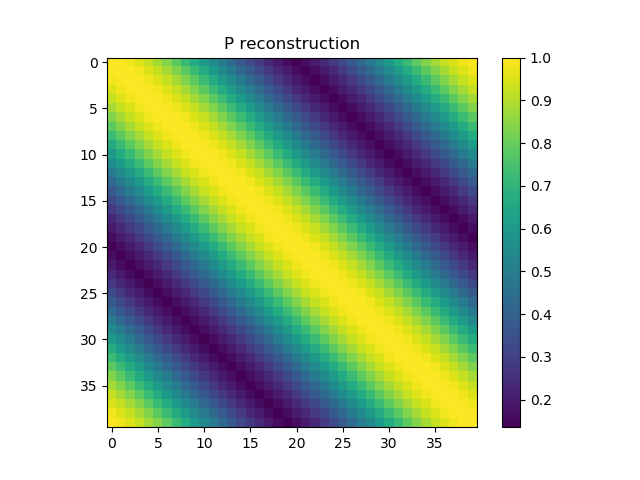

<IPython.core.display.Javascript object>


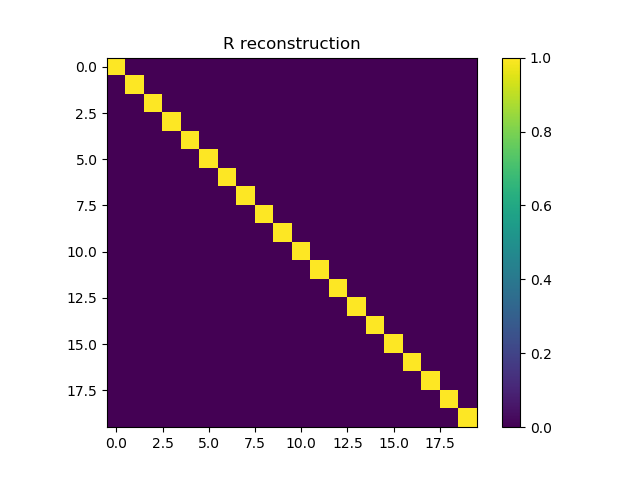

Text(0.5,1,'R reconstruction')

In [18]:
plt.figure()
image = plt.imshow(np.abs(P_sqrt @ P_sqrt))
plt.colorbar(image)
plt.title('P reconstruction')

plt.figure()
image = plt.imshow(np.abs(R_sqrt @ R_sqrt))
plt.colorbar(image)
plt.title('R reconstruction')

In [19]:
P_sqrt_inv = covariance.matrix_sqrt_inv(
    eig_val=P_eval, eig_vec=P_evec)
R_sqrt_inv = covariance.matrix_sqrt_inv(
    eig_val=R_eval, eig_vec=R_evec)

<IPython.core.display.Javascript object>


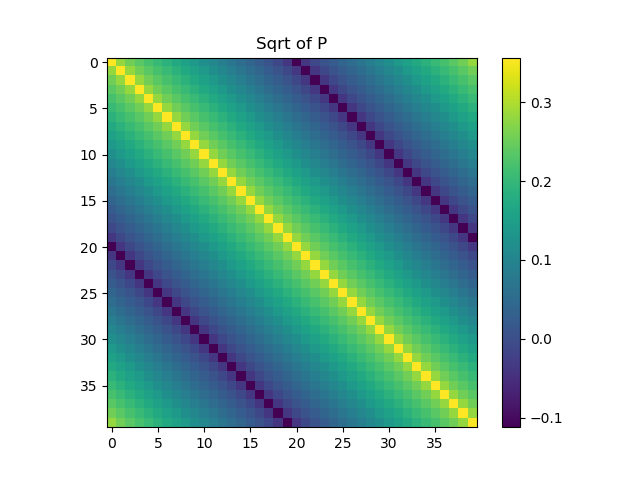

<IPython.core.display.Javascript object>


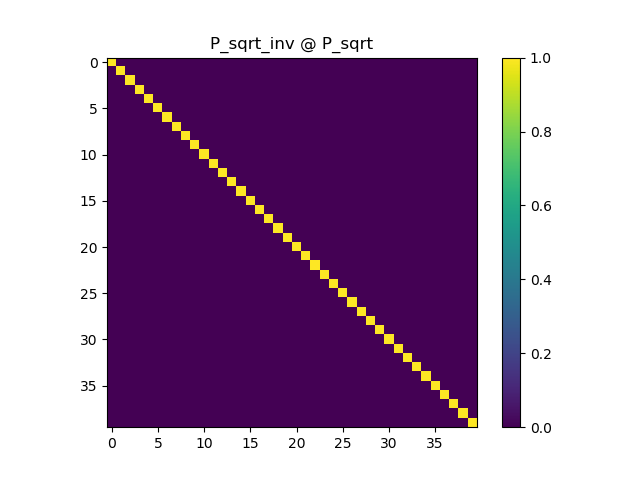

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


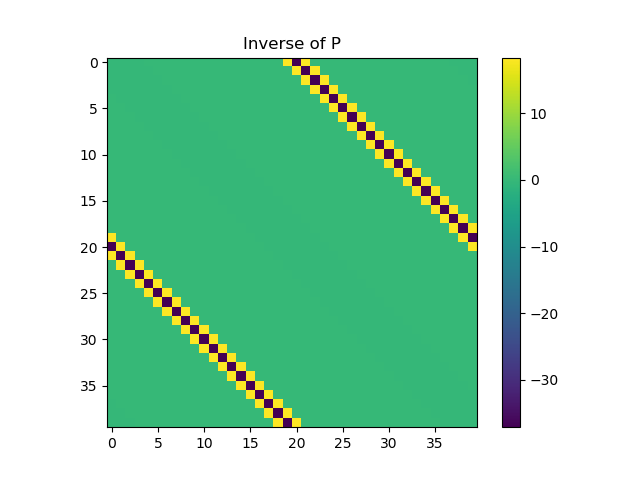

<IPython.core.display.Javascript object>


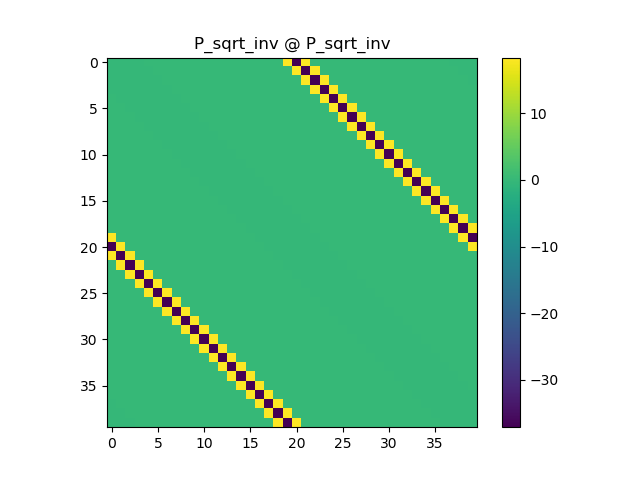

Text(0.5,1,'P_sqrt_inv @ P_sqrt_inv')

In [20]:
# P_inv = (P_sqrt_inv @ P_sqrt_inv)

plt.figure()
image = plt.imshow(P_sqrt.real)
plt.colorbar(image)
plt.title('Sqrt of P')

plt.figure()
image = plt.imshow((P_sqrt_inv @ P_sqrt).real)
plt.colorbar(image)
plt.title('P_sqrt_inv @ P_sqrt')


plt.figure()
image = plt.imshow(P_inv)
plt.colorbar(image)
plt.title('Inverse of P')

plt.figure()
image = plt.imshow((P_sqrt_inv @ P_sqrt_inv).real)
plt.colorbar(image)
plt.title('P_sqrt_inv @ P_sqrt_inv')

In [21]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [83]:
ens_size = int(1e5)
mu = np.zeros(dimension)
X_ens = covariance.generate_ensemble(mu, P_sqrt.real, ens_size)
X_ens = X_ens

In [84]:
mu_s = X_ens.mean(axis=1)
P_sample = (X_ens - mu_s[:, None]) @ (X_ens - mu_s[:, None]).conj().T/ens_size

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


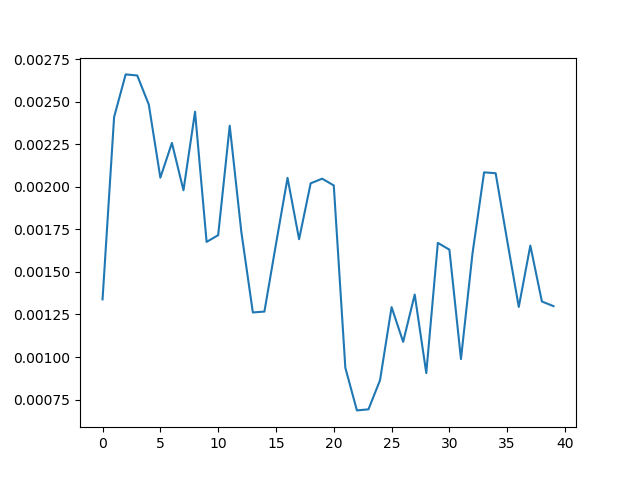

<IPython.core.display.Javascript object>


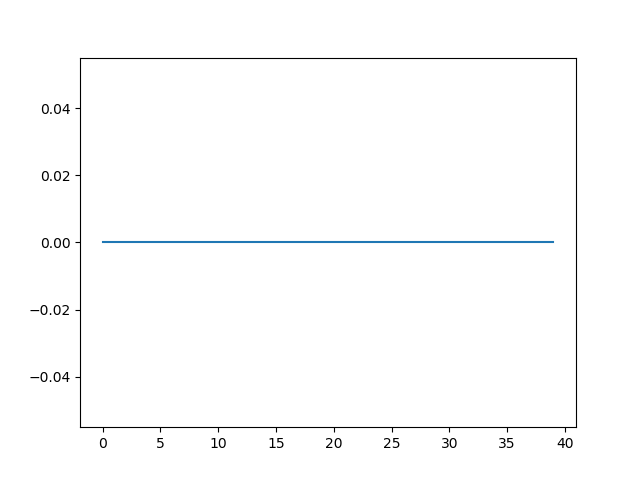

In [85]:
plt.figure()
plt.plot(mu_s.real)

plt.figure()
plt.plot(mu_s.imag)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


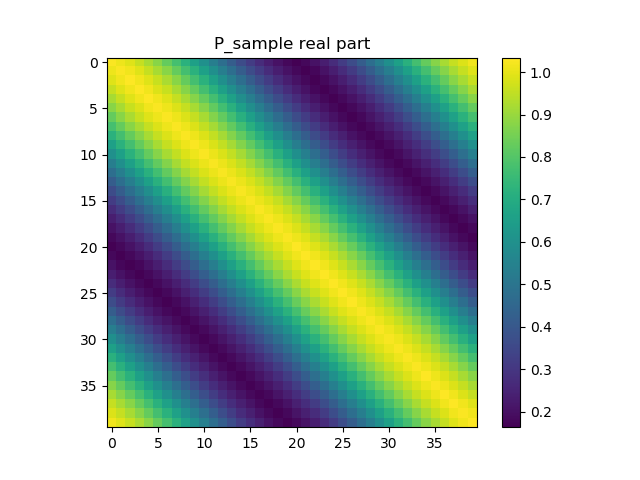

<IPython.core.display.Javascript object>


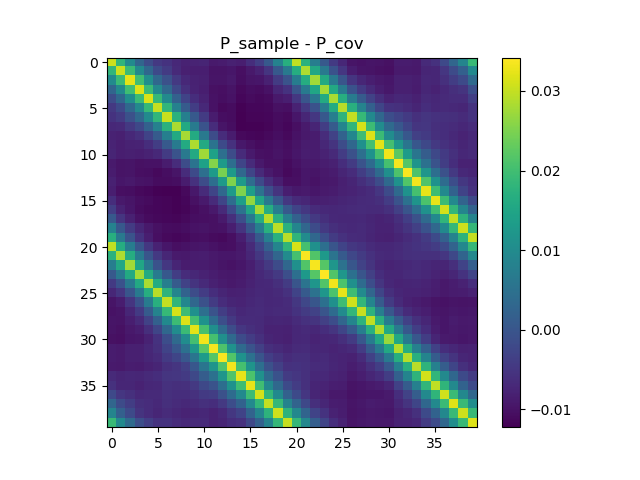

<IPython.core.display.Javascript object>


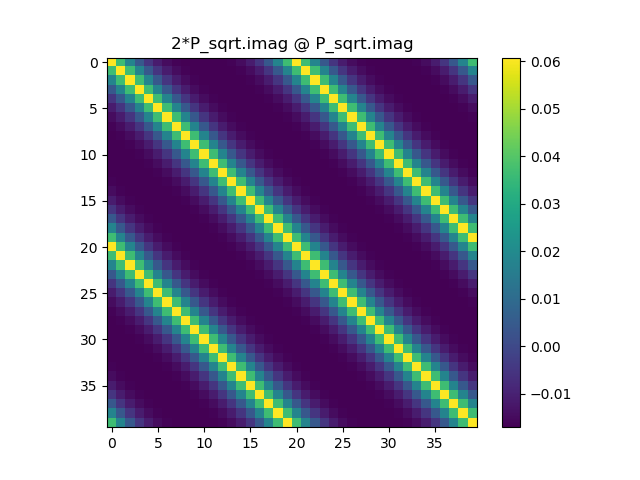

<IPython.core.display.Javascript object>


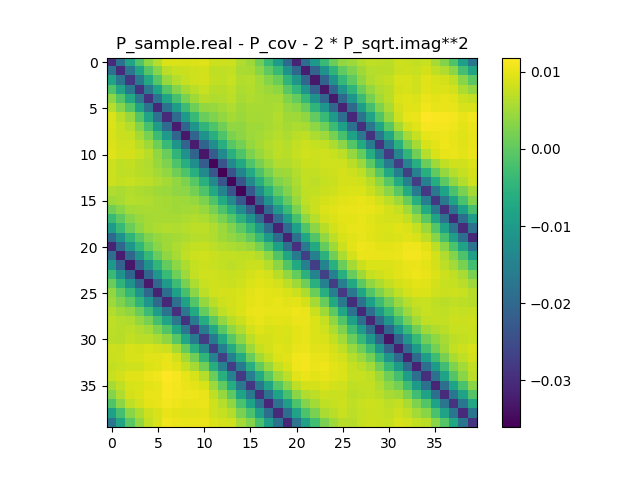

<IPython.core.display.Javascript object>


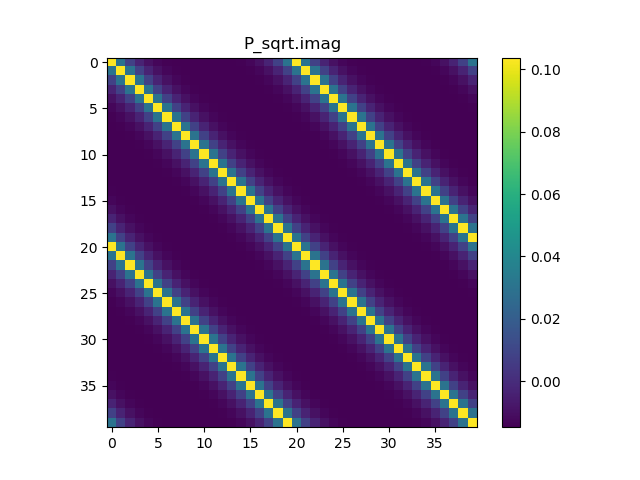

<IPython.core.display.Javascript object>


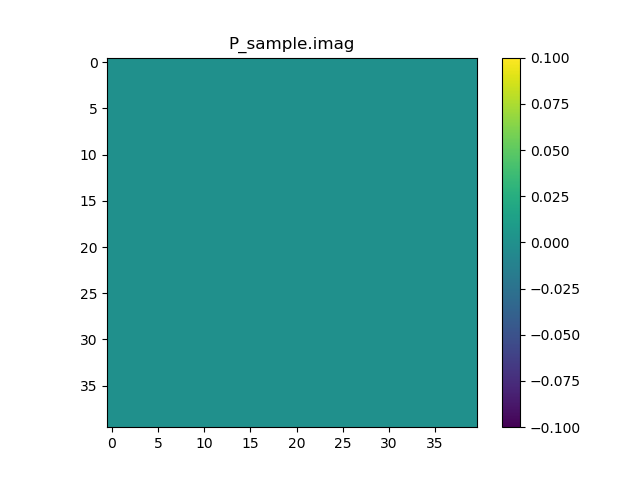

Text(0.5,1,'P_sample.imag')

In [86]:
plt.figure()
im = plt.imshow(P_sample.real)
plt.title('P_sample real part')
plt.colorbar(im)

plt.figure()
im = plt.imshow(P_sample.real - P_cov)
plt.title('P_sample - P_cov')
plt.colorbar(im)

plt.figure()
im = plt.imshow(2*(P_sqrt.imag @ P_sqrt.imag))
plt.colorbar(im)
plt.title('2*P_sqrt.imag @ P_sqrt.imag')

plt.figure()
im = plt.imshow(P_sample.real - P_cov - 2 * (P_sqrt.imag @ P_sqrt.imag))
plt.title('P_sample.real - P_cov - 2 * P_sqrt.imag**2')
plt.colorbar(im)

plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('P_sqrt.imag')

plt.figure()
im = plt.imshow(P_sample.imag)
plt.colorbar(im)
plt.title('P_sample.imag')

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


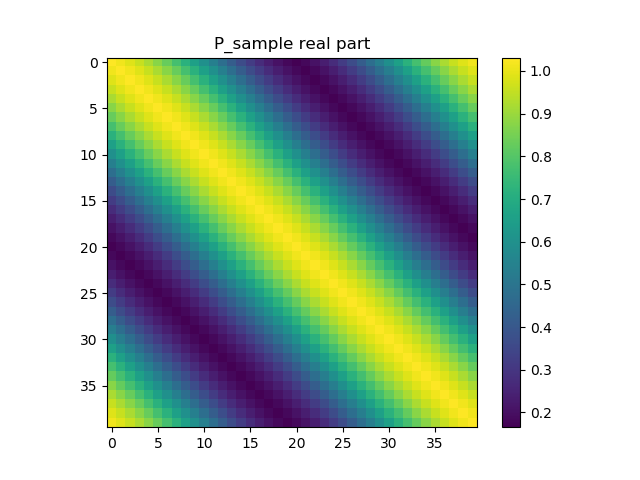

<IPython.core.display.Javascript object>


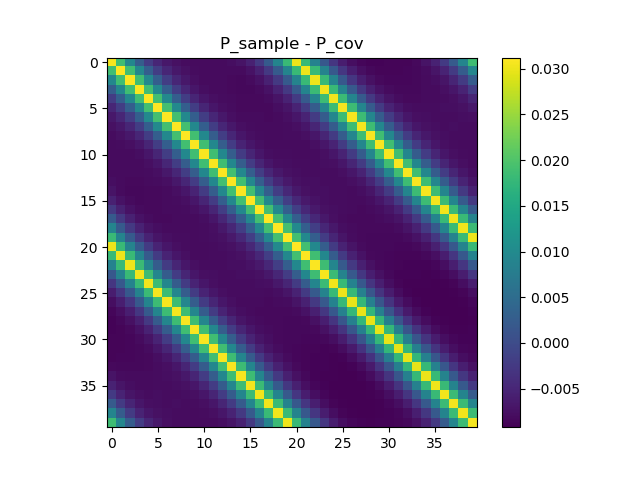

<IPython.core.display.Javascript object>


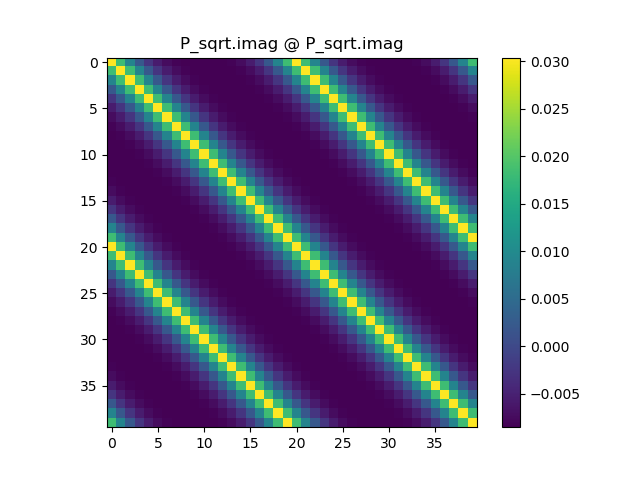

<IPython.core.display.Javascript object>


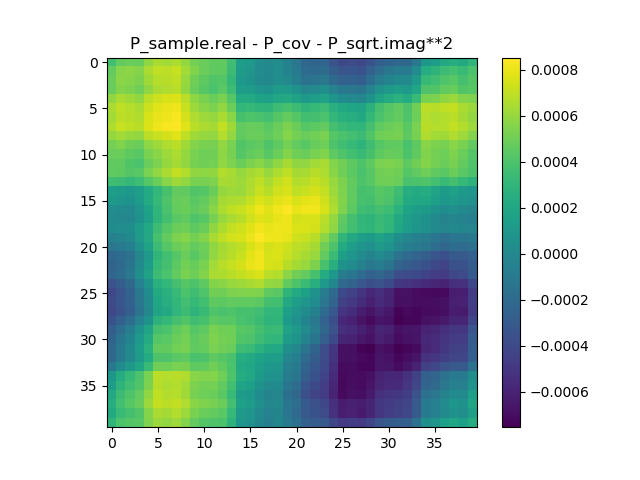

<IPython.core.display.Javascript object>


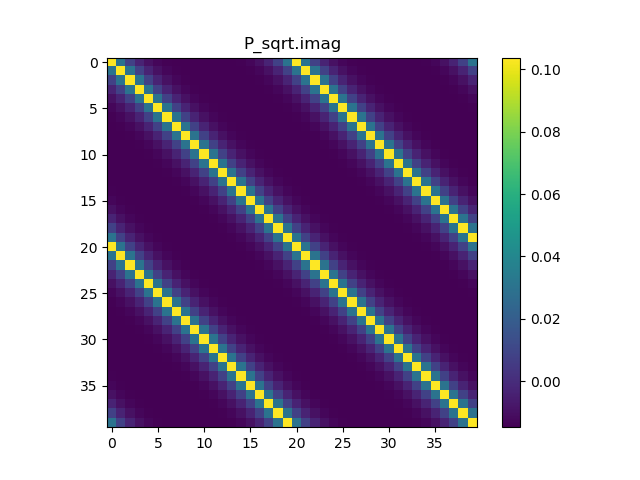

<IPython.core.display.Javascript object>


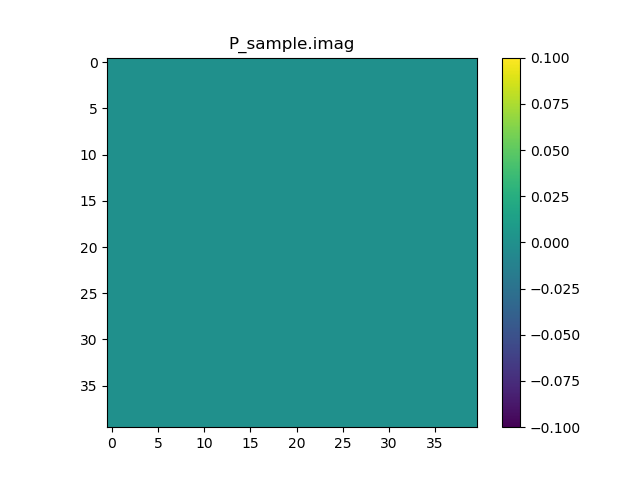

Text(0.5,1,'P_sample.imag')

In [59]:
plt.figure()
im = plt.imshow(P_sample.real)
plt.title('P_sample real part')
plt.colorbar(im)

plt.figure()
im = plt.imshow(P_sample.real - P_cov)
plt.title('P_sample - P_cov')
plt.colorbar(im)

plt.figure()
im = plt.imshow((P_sqrt.imag @ P_sqrt.imag))
plt.colorbar(im)
plt.title('P_sqrt.imag @ P_sqrt.imag')

plt.figure()
im = plt.imshow(P_sample.real - P_cov - (P_sqrt.imag @ P_sqrt.imag))
plt.title('P_sample.real - P_cov - P_sqrt.imag**2')
plt.colorbar(im)

plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('P_sqrt.imag')

plt.figure()
im = plt.imshow(P_sample.imag)
plt.colorbar(im)
plt.title('P_sample.imag')